In [1]:
import pandas as pd
import sqlite3

# Exercise 03 : Bar charts

In [2]:
con = sqlite3.connect('data/checking-logs.sqlite')

In [69]:
query ="""
SELECT timestamp AS commit_time
FROM checker
WHERE uid LIKE 'user_%'
"""

df = pd.read_sql(query, con)
df

,commit_time
0,2020-04-17 05:19:02.744528
1,2020-04-17 05:22:35.249331
2,2020-04-17 05:22:45.549397
3,2020-04-17 05:34:14.691200
4,2020-04-17 05:34:24.422370
...,...
3202,2020-05-21 20:19:06.872761
3203,2020-05-21 20:22:41.785725
3204,2020-05-21 20:22:41.877806
3205,2020-05-21 20:37:00.129678


In [70]:
df['commit_time'] =  pd.to_datetime(df['commit_time'])
df['day of week'] = df['commit_time'].dt.day_name()
df['hour'] = df['commit_time'].dt.hour
df.drop(columns=['commit_time'], inplace=True)

df

,day of week,hour
0,Friday,5
1,Friday,5
2,Friday,5
3,Friday,5
4,Friday,5
...,...,...
3202,Thursday,20
3203,Thursday,20
3204,Thursday,20
3205,Thursday,20


In [115]:
working_days = df[df['day of week'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])]
working_counts = working_days.groupby(['hour', 'day of week']).size().reset_index(name='count')
working_counts

,hour,day of week,count
0,0,Thursday,6
1,3,Monday,2
2,5,Friday,13
3,5,Thursday,2
4,6,Friday,1
...,...,...,...
76,22,Thursday,8
77,22,Tuesday,6
78,22,Wednesday,18
79,23,Monday,4


In [111]:
#среднее
avg_work_commits = working_counts.groupby('hour')['count'].mean().reset_index(name='working_day')
avg_work_commits.head(6)

,hour,working_day
0,0,6.000000
1,3,2.000000
2,5,7.500000
3,6,1.500000
4,7,10.333333
5,8,9.250000


In [82]:
weekend_days = df[df['day of week'].isin(['Sunday', 'Saturday'])]
weekends_counts = weekend_days.groupby(['hour', 'day of week']).size().reset_index(name='count')
weekends_counts.head(6)

,hour,day of week,count
0,0,Sunday,6
1,1,Sunday,6
2,3,Saturday,1
3,5,Sunday,2
4,7,Saturday,14
5,7,Sunday,2


In [87]:
# среднее
avg_weekend_commits = weekends_counts.groupby('hour')['count'].mean().reset_index(name='weekend')
avg_weekend_commits.head(6)

,hour,weekend
0,0,6.0
1,1,6.0
2,3,1.0
3,5,2.0
4,7,8.0
5,8,14.0


<Axes: title={'center': 'working_day'}, xlabel='hour'>

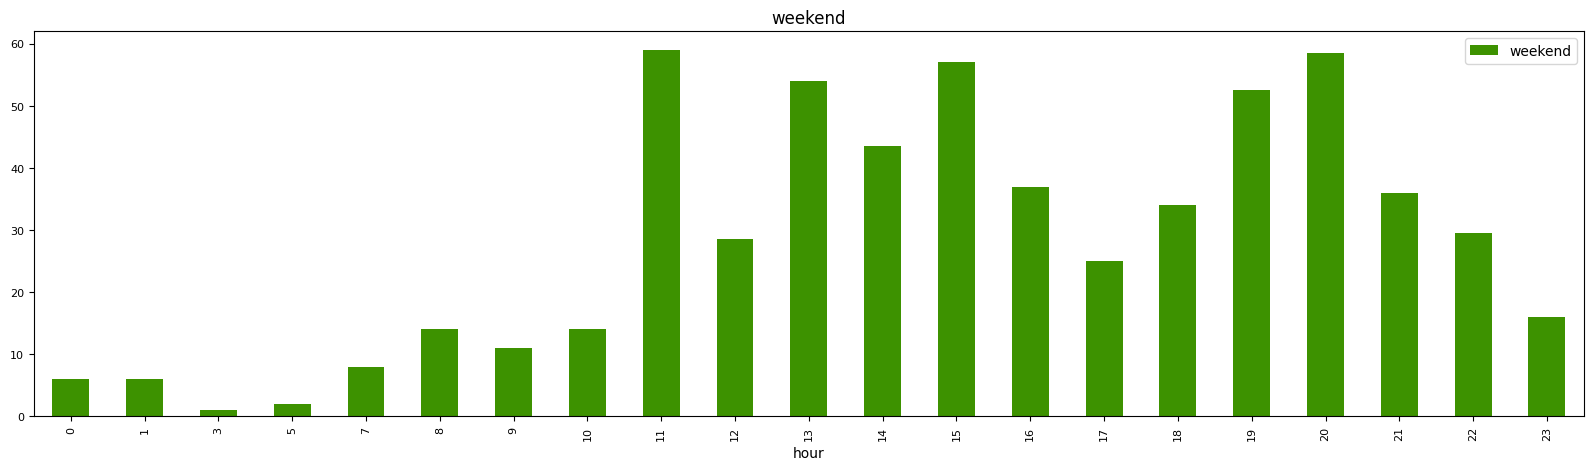

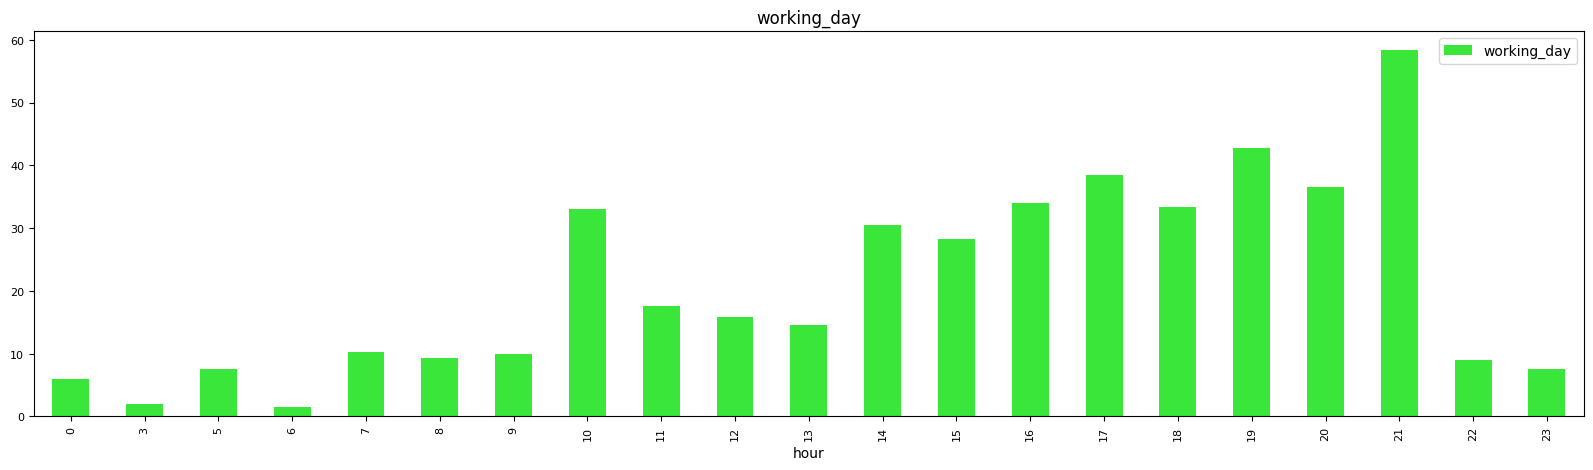

In [116]:
ax = avg_weekend_commits.plot(kind='bar', figsize=(20, 5), fontsize=8, color='#3D9200',
                           label='weekend', x='hour', subplots=True)

avg_work_commits.plot(kind='bar', color='#39E639', 
                         label='working_day', title='working_day',
                        figsize=(20, 5), fontsize=8, x='hour')

## at the end of your Jupyter Notebook, create a markdown cell and insert the question
- “Is the dynamic different on working days and weekends?”, for the answer include the hour when the number of commits is the largest during working days and the hour when it is the largest during the weekend.

Answer:
- max_working: 21
- max_weekend: 11

In [117]:
con.close()